![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Descoberta do Conhecimento

* **Prof. Cleilton Lima Rocha**
* **emails:** climarocha@gmail.com
* **deadline: 11/10/2021**

Para este projeto exploraremos os dados **Call_Data.csv** disponível na pasta.


Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada. Para isto eles têm disponível o histórico de tudo o que já foi resolvido, por ele e por seus colegas, e sua solução de Data Science capaz de prever a variável alvo da nossa prova será **Event Clearance Description**.

Boa prova e hands on!

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Prova KDD - Turma 8 - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html ou PDF), com o nome dos membros da equipe, para meu email, climarocha@gmail.com até o dia **11/10/2021**.

# Questões

**1. Importe o data set *call_data.csv* e considere a variável alvo 'Event Clearance Description'(0,5 pontos)** 
     * 1.1. Como está o balanceamento das classes?*
     * P.S.: Não é obrigatório aplicar o undersampling and oversampling sobre o dataset
     * P.S.: Se desejar você pode usar o dataset **call_data_small.csv** apenas pra agilizar o desenvolvimento no final tudo deve ser realizado com o **call_data.csv**

In [1]:
#!pip install seaborn

In [2]:
#!pip install imblearn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler 
    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [4]:
df = pd.read_csv('Call_Data_Small.csv')

In [5]:
print(df['Event Clearance Description'].value_counts())

REPORT WRITTEN (NO ARREST)                    38008
ORAL WARNING GIVEN                            16837
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)    12673
UNABLE TO LOCATE INCIDENT OR COMPLAINANT      10150
PHYSICAL ARREST MADE                           8404
FALSE COMPLAINT/UNFOUNDED                      4527
PROBLEM SOLVING PROJECT                        3303
Name: Event Clearance Description, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Event Clearance Description'>

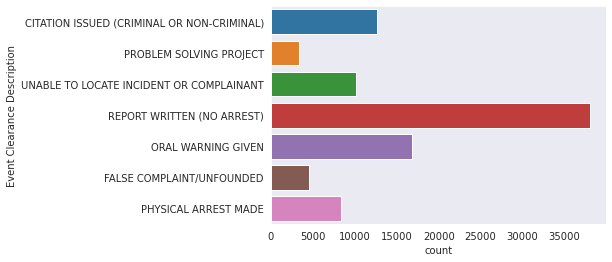

In [6]:
sns.countplot(y="Event Clearance Description", data=df)

As classes estão desbalanceadas. Tentar aplicar técnicas de balanceamento depois.

**2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (1,0 pontos)**
   * PS.: Utilize recursos visuais, por exemplo gráficos

In [7]:
df.head(3)

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3


- Como a chamada foi resolvida de acordo com a prioridade?

<AxesSubplot:xlabel='count', ylabel='Event Clearance Description'>

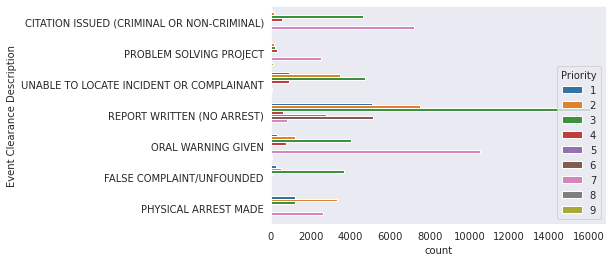

In [8]:
sns.countplot(y='Event Clearance Description', hue='Priority', data=df)

- E pelo tipo de chamada?

<AxesSubplot:xlabel='count', ylabel='Event Clearance Description'>

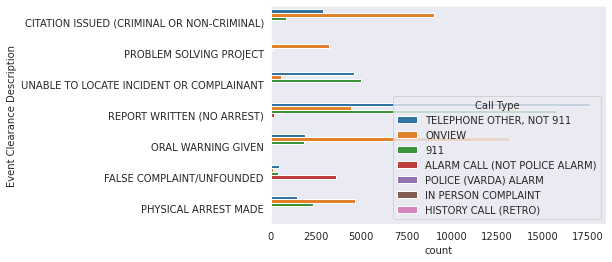

In [9]:
sns.countplot(y='Event Clearance Description', hue='Call Type', data=df)

- E levando em consideração a prioridade e tipo da chamada?

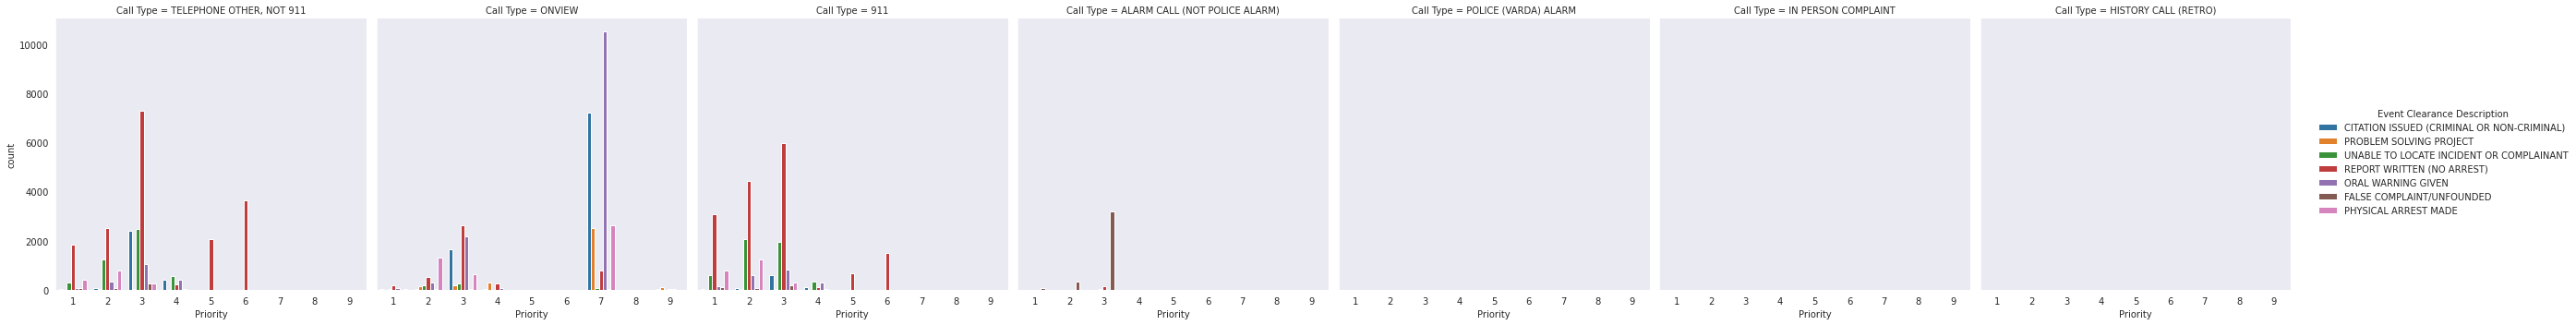

In [10]:
sns.catplot(x='Priority', hue='Event Clearance Description', col="Call Type", kind="count", data=df)

- Qual setor recebeu/atendeu mais chamadas?

<AxesSubplot:xlabel='count', ylabel='Sector'>

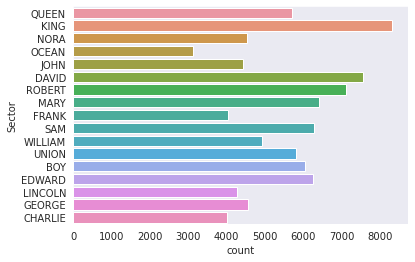

In [11]:
sns.countplot(y='Sector', data=df)

- Qual delegacia recebeu/atendeu mais chamadas?

<AxesSubplot:xlabel='count', ylabel='Precinct'>

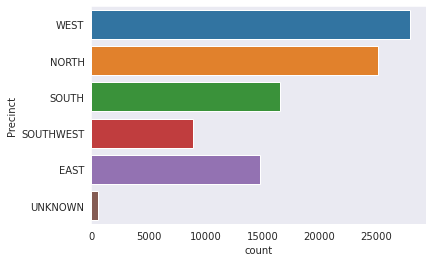

In [12]:
sns.countplot(y='Precinct', data=df)

- E levando em consideração a delegacia e o setor?

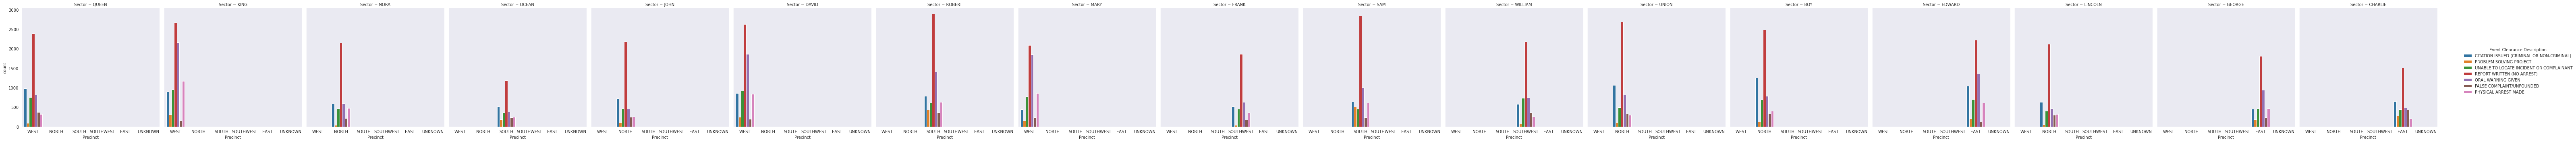

In [13]:
sns.catplot(x='Precinct', hue='Event Clearance Description', col="Sector", kind="count", data=df)

- Correlação das variáveis

<AxesSubplot:>

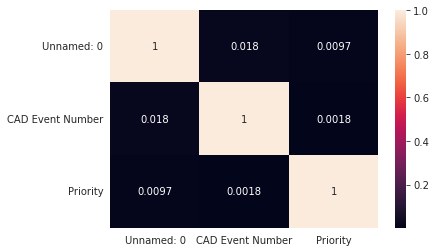

In [14]:
sns.heatmap(df.corr(), annot=True)

**3. Realize o tratamento que você julgar mais adequado aos dados. (2,0 pontos)**
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário
  * P.S.: A criação de um pipeline lhe dará pontos extras e melhorará o reaproveitamento de código

- Verificando valores nulos

In [15]:
def analisando_nulos(df):
    
    percent = df.count()/len(df.index)
    percent_df = 1 - percent
    percent_df = percent_df.to_frame()
    percent_df.rename(columns={0: 'percent'}, inplace=True)
    percent_df.head(20)
    
    sns.barplot(data=percent_df.transpose(), orient='h')
    

<AxesSubplot:>

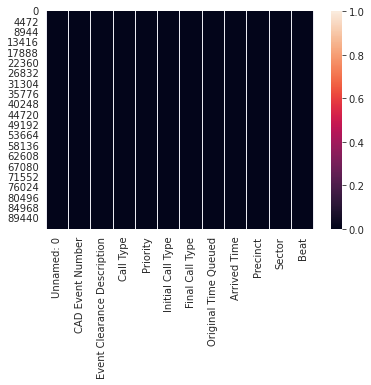

In [16]:
sns.heatmap(data=df.isnull())

No mapa de calor não aponta valores nulos em nenhuma das colunas mas a coluna setor possui 597 de linhas que não estão preenchidas. 

In [17]:
df['Sector'].isna().sum()

597

In [18]:
df.count()

Unnamed: 0                     93902
CAD Event Number               93902
Event Clearance Description    93902
Call Type                      93902
Priority                       93902
Initial Call Type              93902
Final Call Type                93902
Original Time Queued           93902
Arrived Time                   93902
Precinct                       93902
Sector                         93305
Beat                           93902
dtype: int64

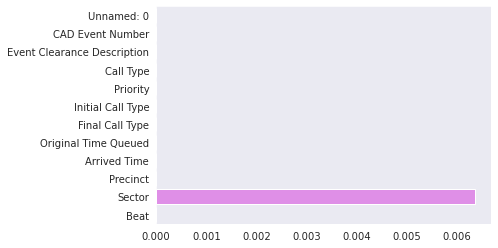

In [19]:
analisando_nulos(df)

Foi tomada a decisão de preenche-la a partir da delegancia mas foi observado que, quando essa situação ocorre, a delegacia é desconhecida. Por conta disso, resolvemos excluir essas linhas.

In [20]:
df[df['Sector'].isnull()]

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
159,367,2009000189786,REPORT WRITTEN (NO ARREST),ONVIEW,3,NARCOTICS - FOUND,NARCOTICS - FOUND,06/02/2009 01:13:53 PM,Jun 2 2009 01:13:53:000PM,UNKNOWN,NaN,DET
288,674,2009000190157,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ASSIST OTHER AGENCY - COUNTY AGENCY,06/02/2009 06:28:44 PM,Jun 2 2009 06:28:44:000PM,UNKNOWN,NaN,TRF
423,1006,2009000190565,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,06/03/2009 12:29:32 AM,Jun 3 2009 12:29:32:000AM,UNKNOWN,NaN,99
437,1039,2009000190602,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,06/03/2009 01:18:51 AM,Jun 3 2009 01:18:51:000AM,UNKNOWN,NaN,L3
656,1553,2009000191199,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,06/03/2009 02:11:29 PM,Jun 3 2009 02:11:29:000PM,UNKNOWN,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...
92762,197609,2009000429378,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,AUTO THEFT - VEH THEFT OR THEFT & RECOVERY,--AUTOMOBILES - AUTO THEFT,12/14/2009 02:57:01 AM,Dec 14 2009 03:44:00:000AM,UNKNOWN,NaN,99
92903,197896,2009000429717,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - THEFT,--THEFT - ALL OTHER,12/14/2009 12:14:41 PM,Dec 14 2009 03:01:41:000PM,UNKNOWN,NaN,CTY
93016,198107,2009000429973,PHYSICAL ARREST MADE,ONVIEW,2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--WARRANT SERVICES - FELONY,12/14/2009 04:08:14 PM,Dec 14 2009 04:08:14:000PM,UNKNOWN,NaN,99
93189,198473,2009000430434,PHYSICAL ARREST MADE,ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--WARRANT SERVICES - MISDEMEANOR,12/15/2009 03:06:44 AM,Dec 15 2009 03:06:44:000AM,UNKNOWN,NaN,99


In [21]:
df = df[df['Sector'].notnull()]

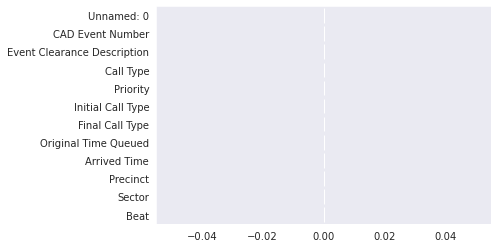

In [22]:
analisando_nulos(df)

Após isso, não foi mais observado valores nulos.

- Deletando campos Unnamed: 0 e CAD Event Number por serem sequenciais.

In [23]:
df.drop(['Unnamed: 0', 'CAD Event Number'], axis=1, inplace=True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2


- Valores categóricos em variaveis numéricas

In [25]:
#Call Type

values = pd.get_dummies(df['Call Type'], drop_first=True)
df.drop(['Call Type'],axis=1,inplace=True)
df = pd.concat([df,values],axis=1)
df.head(5)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Event Clearance Description,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,ALARM CALL (NOT POLICE ALARM),HISTORY CALL (RETRO),IN PERSON COMPLAINT,ONVIEW,POLICE (VARDA) ALARM,"TELEPHONE OTHER, NOT 911"
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1,0,0,0,0,0,1
1,PROBLEM SOLVING PROJECT,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1,0,0,0,1,0,0
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3,0,0,0,0,0,1
3,REPORT WRITTEN (NO ARREST),2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1,0,0,0,0,0,1
4,REPORT WRITTEN (NO ARREST),3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2,0,0,0,1,0,0


In [26]:
#Initial Call Type

values = pd.get_dummies(df['Initial Call Type'], drop_first=True)
df.drop(['Initial Call Type'],axis=1,inplace=True)
df = pd.concat([df,values],axis=1)
df.head(5)

,Event Clearance Description,Priority,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,ALARM CALL (NOT POLICE ALARM),HISTORY CALL (RETRO),...,VICE - PROSTITUTION,VICE - VIOLATION OF SOAP ORDER,WARRANT - FELONY PICKUP,WARRANT - MISD WARRANT PICKUP,WARRANT - SEARCH. CAUTION (EXCL NARCOTICS),WARRANT PICKUP - FROM OTHER AGENCY,"WATER FLOODS (BROKEN MAINS/HYDRANTS, NO HAZ)","WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)","WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","WIRES DOWN (PHONE, ELECTRICAL,ETC.)"
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),3,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PROBLEM SOLVING PROJECT,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2,--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,REPORT WRITTEN (NO ARREST),2,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,REPORT WRITTEN (NO ARREST),3,--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Final Call Type

values = pd.get_dummies(df['Final Call Type'], drop_first=True)
df.drop(['Final Call Type'],axis=1,inplace=True)
df = pd.concat([df,values],axis=1)
df.head(5)

,Event Clearance Description,Priority,Original Time Queued,Arrived Time,Precinct,Sector,Beat,ALARM CALL (NOT POLICE ALARM),HISTORY CALL (RETRO),IN PERSON COMPLAINT,...,UNKNOWN - ANI/ALI - WRLS PHNS (INCL OPEN LINE),UNKNOWN - COMPLAINT OF UNKNOWN NATURE,VICE - PORNOGRAPHY,VICE - PROSTITUTION,WARRANT - FELONY PICKUP,WARRANT - MISD WARRANT PICKUP,WARRANT - SEARCH. CAUTION (EXCL NARCOTICS),WARRANT PICKUP - FROM OTHER AGENCY,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)","WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)"
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),3,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PROBLEM SOLVING PROJECT,7,06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,REPORT WRITTEN (NO ARREST),2,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,REPORT WRITTEN (NO ARREST),3,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Precinct

values = pd.get_dummies(df['Precinct'], drop_first=True)
df.drop(['Precinct'],axis=1,inplace=True)
df = pd.concat([df,values],axis=1)
df.head(5)

,Event Clearance Description,Priority,Original Time Queued,Arrived Time,Sector,Beat,ALARM CALL (NOT POLICE ALARM),HISTORY CALL (RETRO),IN PERSON COMPLAINT,ONVIEW,...,WARRANT - FELONY PICKUP,WARRANT - MISD WARRANT PICKUP,WARRANT - SEARCH. CAUTION (EXCL NARCOTICS),WARRANT PICKUP - FROM OTHER AGENCY,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)","WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)",NORTH,SOUTH,SOUTHWEST,WEST
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),3,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,QUEEN,Q1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,PROBLEM SOLVING PROJECT,7,06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,KING,K1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORA,N3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,REPORT WRITTEN (NO ARREST),2,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,OCEAN,O1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,REPORT WRITTEN (NO ARREST),3,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,KING,K2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
#Sector

values = pd.get_dummies(df['Sector'], drop_first=True)
df.drop(['Sector'],axis=1,inplace=True)
df = pd.concat([df,values],axis=1)
df.head(5)

,Event Clearance Description,Priority,Original Time Queued,Arrived Time,Beat,ALARM CALL (NOT POLICE ALARM),HISTORY CALL (RETRO),IN PERSON COMPLAINT,ONVIEW,POLICE (VARDA) ALARM,...,KING,LINCOLN,MARY,NORA,OCEAN,QUEEN,ROBERT,SAM,UNION,WILLIAM
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),3,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,Q1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,PROBLEM SOLVING PROJECT,7,06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,K1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,N3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,REPORT WRITTEN (NO ARREST),2,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,O1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,REPORT WRITTEN (NO ARREST),3,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,K2,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
#Beat

values = pd.get_dummies(df['Beat'], drop_first=True)
df.drop(['Beat'],axis=1,inplace=True)
df = pd.concat([df,values],axis=1)
df.head(5)

,Event Clearance Description,Priority,Original Time Queued,Arrived Time,ALARM CALL (NOT POLICE ALARM),HISTORY CALL (RETRO),IN PERSON COMPLAINT,ONVIEW,POLICE (VARDA) ALARM,"TELEPHONE OTHER, NOT 911",...,R3,S1,S2,S3,U1,U2,U3,W1,W2,W3
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),3,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,PROBLEM SOLVING PROJECT,7,06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,2,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,REPORT WRITTEN (NO ARREST),2,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,REPORT WRITTEN (NO ARREST),3,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**5. Construa os modelos de aprendizagem de máquina para cada modelo (1,0 ponto)**   --- Qualquer modelo que eu quiser?

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Event Clearance Description'], axis=1), 
                                                   df['Event Clearance Description'], 
                                                    test_size=0.30, 
                                                    random_state=100)

In [33]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

**6. Para cada modelo aplique uma combinação aos hiperparâmetros com o GridSearch e aplique também o CrossValidation (2,0 pontos)**
  * P.S.: Explique, com suas palavras, a necessidade de utilizar GridSearch e CrossValidation
  * P.S.: Explique a importância de no mínimo um hiperparâmetro para cada modelo

**7. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica. (1,0 ponto)**

**8. Escolha um dos modelos, por exemplo o melhor modelo, e faça uma análise do overfitting e underfitting. Justique sua resposta com base em experimentos. (1,5 pontos)**
   * Analise no mínimo 2 hiperparâmetros e também o número de amostras utilizado no treinamento
   * Utilize recursos visuais, por exemplo gráficos, se você achar neccessário

**9. Realize a predição sobre os dados test_call_data.csv, disponibilizado a parte do arquivo Call_Data.csv, como o seu modelo saiu? (1,0 ponto)**

**10. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância das features. Por exemplo, a feature chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P. (1,0 ponto)**

 **11. Aplique clusterização, preferencialmente o KMeans sobre o dado, e comunique suas novas descobertas, sinta-se a vontade para apresentar uma solução com recursos visuais (2,0 pontos)**

# Bom trabalho!